<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/Home_builder_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Get Data**

In [41]:
tickers = {
    'DHI': 'D.R. Horton',
    'LGIH': 'LGI Homes',
    'CCS': 'Century Communities',
    'LEN': 'Lennar Corporation',
    'PHM': 'PulteGroup',
    'KBH': 'KB Home',
    'MTH': 'Meritage Homes',
    'TOL': 'Toll Brothers',
    'TMHC': 'Taylor Morrison',
    'TPH': 'Tri Pointe Homes',
    'NVR': 'Ryan Homes'
}

market_segments = {
    # Entry-Level (Green shades)
    'DHI': ('Entry-Level', '#2E7D32'),     # Dark Green
    'LGIH': ('Entry-Level', '#388E3C'),    # Medium Green
    'CCS': ('Entry-Level', '#43A047'),     # Light Green

    # Mid-Market (Blue shades)
    'LEN': ('Mid-Market', '#1565C0'),      # Dark Blue
    'PHM': ('Mid-Market', '#1976D2'),      # Medium Blue
    'KBH': ('Mid-Market', '#1E88E5'),      # Light Blue
    'MTH': ('Mid-Market', '#42A5F5'),      # Lighter Blue

    # Premium/Luxury (Red/Purple shades)
    'TOL': ('Premium/Luxury', '#C62828'),  # Dark Red
    'TMHC': ('Premium/Luxury', '#D32F2F'), # Medium Red
    'TPH': ('Premium/Luxury', '#F44336'),  # Light Red
    'NVR': ('Premium/Luxury', '#7B1FA2'),  # Purple (NVR is high-end)
}

In [39]:
end_date = datetime.now()
start_date = end_date - timedelta(days=6*365)

stock_data = {}
for ticker in tickers.keys():
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        data = data[('Close', ticker)]
        data.name = ticker
        stock_data[ticker] = data
        print(f"✓ Downloaded {ticker}")
    except Exception as e:
        print(f"✗ Error downloading {ticker}: {e}")
stock_data = pd.concat(stock_data, axis=1)

/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded DHI
✓ Downloaded LGIH


/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded CCS


/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded LEN


/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded PHM


/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded KBH


/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded MTH
✓ Downloaded TOL


/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded TMHC
✓ Downloaded TPH


/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
/tmp/ipython-input-1635634033.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✓ Downloaded NVR


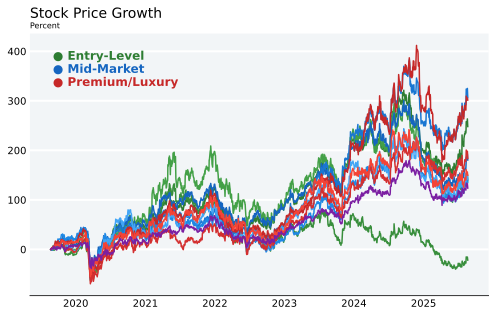

In [49]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.06, s='Stock Price Growth', transform=ax.transAxes, size=14)
ax.text(0., 1.02, s='Percent', transform=ax.transAxes, size=8)
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)


ax.annotate('● Entry-Level', xy=(.05, 0.9), xycoords='axes fraction', fontsize=12, fontweight='bold', color='#2E7D32')
ax.annotate('● Mid-Market', xy=(.05, 0.85), xycoords='axes fraction', fontsize=12, fontweight='bold', color='#1565C0')
ax.annotate('● Premium/Luxury', xy=(.05, 0.8), xycoords='axes fraction', fontsize=12, fontweight='bold', color='#C62828')


for stock in stock_data.columns:
  plt.plot(stock_data.index, (stock_data[stock] -  stock_data[stock].iloc[0])/ stock_data[stock].iloc[0]*100, color=market_segments[stock][1])
fig.savefig('./home_builder_stock_price.png')
plt.show()